In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [150]:
raw_data = pd.read_csv("fifa21_male2.csv")
raw_data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [151]:
raw_data.shape

(17125, 107)

In [152]:
pd.set_option('display.max_columns', None)

In [153]:
#change team column into three columns
raw_data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [154]:
raw_data.Value

0        €625K
1        €600K
2        €1.1M
3           €0
4        €5.5M
         ...  
17120    €550K
17121    €130K
17122    €130K
17123    €475K
17124    €325K
Name: Value, Length: 17125, dtype: object

### Dealing with Empty Values

In [155]:
num_cols = raw_data.select_dtypes(include=['float64', 'int64']).columns
non_num_cols = raw_data.select_dtypes(exclude=['float64', 'int64']).columns


In [156]:
raw_data[num_cols] = raw_data[num_cols].fillna(raw_data[num_cols].mean())

In [157]:
for col in non_num_cols:
    raw_data[col].fillna(raw_data[col].mode()[0], inplace=True)

### Checking for Multicolianerity and Removing Columns

In [158]:
X_num = raw_data.select_dtypes(include = np.number)
X_cat = raw_data.select_dtypes(include = np.object)
X_num

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,69.0,63.0,66.000000,50,59.940965,208,70,69,69.000000,56,14,5,15,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,71.0,72.0,73.000000,75,79.000000,153,70,43,40.000000,56,9,12,13,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,39.0,69.0,74.000000,66,59.940965,99,35,34,30.000000,51,9,6,13,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,70.0,72.0,55.443605,70,59.940965,75,34,41,46.099725,68,5,21,64,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,70.0,78.0,93.000000,71,89.000000,181,68,57,56.000000,45,6,13,6,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,58.0,23.0,29.000000,39,46.000000,198,61,71,66.000000,39,11,8,8,5,7,1367,302,54,30,37,48,64,69
17121,259090,18,56,58,66,10,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,50.0,55.0,53.000000,50,46.000000,132,34,42,56.000000,57,12,15,7,12,11,1529,319,62,46,57,56,43,55
17122,259091,18,56,56,67,11,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,55.0,49.0,45.000000,49,43.000000,163,55,54,54.000000,40,8,7,5,12,8,1430,303,63,35,44,52,54,55
17123,259101,20,62,62,73,11,223,62,26,52,60,23.000000,258,55,43.000000,46,57,57,349,72,70,74.000000,56,77.000000,261,51,72.000000,57,48,33,257,61,58.0,46.0,56.000000,36,54.000000,180,57,62,61.000000,51,15,13,8,6,9,1579,335,71,34,58,59,59,54


In [159]:
# OPTION 2
correlation_matrix = X_num.corr().apply(lambda x: round(x,2))

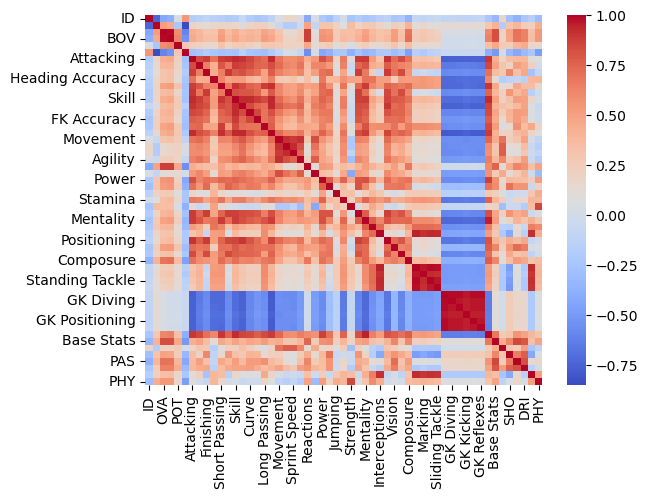

In [160]:
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [161]:
high_corr_cols = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.70:
            colname = correlation_matrix.columns[i]
            high_corr_cols.add(colname)

In [162]:
raw_data = raw_data.drop(columns=high_corr_cols)

In [163]:
raw_data =raw_data.drop(columns = ["Player Photo" , "Club Logo","Flag Photo", "Gender","ID"])
raw_data

,Name,OVA,Nationality,Club,BP,Position,POT,Team & Contract,Height,Weight,foot,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Jumping,Strength,W/F,SM,A/W,D/W,IR,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,G. Pasquale,69,Italy,Udinese,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008","Jun 30, 2021",€625K,€7K,€0,2008 ~ 2016,313,68.000000,68,3 ★,2★,Medium,High,2 ★,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
1,Luis García,71,Spain,KAS Eupen,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014","Jun 30, 2021",€600K,€7K,€1.1M,2014 ~ 2019,337,54.000000,60,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
2,J. Cole,71,England,Coventry City,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016","Jun 30, 2021",€1.1M,€15K,€0,2016 ~ 2020,337,58.000000,56,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
3,D. Yorke,68,Trinidad &amp; Tobago,Sunderland,ST,CB,82,Sunderland 2009,"5'11""",165lbs,Right,"Jul 1, 2019","Jun 30, 2021",€0,€0,€0,2009,264,65.170212,66,3 ★,1★,Medium,Medium,1 ★,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
4,Iniesta,81,Spain,Vissel Kobe,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018","Jun 30, 2021",€5.5M,€12K,€7.2M,2018 ~ 2021,367,40.000000,62,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,64,France,CD Tondela,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020","Jun 30, 2021",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,70.000000,74,2 ★,2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2
17121,W. Rickard,56,Wales,Burnley,CAM,CAM CM,66,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020","Jun 30, 2021",€130K,€3K,€273K,2020 ~ 2021,248,62.000000,57,3 ★,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2
17122,C. Barrett,56,England,Burnley,RB,RB,67,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020","Jun 30, 2021",€130K,€2K,€273K,2020 ~ 2022,218,61.000000,54,3 ★,2★,Medium,Medium,1 ★,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2
17123,J. Gazibegović,62,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,73,SK Sturm Graz 2020 ~ 2023,"5'9""",148lbs,Right,"Sep 30, 2020","Jun 30, 2021",€475K,€3K,€784K,2020 ~ 2023,223,72.000000,48,4 ★,2★,High,Medium,1 ★,5,48+2,48+2,48+2,55+0,52+0,52+0,52+0,55+0,54+2,54+2,54+2,56+2,55+2,55+2,55+2,56+2,60+2,58+2,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2
